# Active Learning experiment on MNIST




In [25]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..", "..")
MODULES_PATH = os.path.join(BASE_PATH, "modules")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")

In [27]:
sys.path.append(MODULES_PATH)

In [28]:
from active_learning import ExperimentSuitMetrics
from utils import MetricsTransformer

In [29]:
dtypes = {
    "iteration": int,
    "train_time": float,
    "eval_loss": float,
    "eval_accuracy": float,
    "query_time": float,
    "labeled_pool_size": int,
    "method": str
}

# MC Dropout

In [30]:
def load_frames_from_dirs(experiment_dirs, load_pattern="mc_dropout"):
    """
        Load metrics from different 
    """
    
    experiment_frames = {}
    for experiment_name in experiment_dirs:
        path = os.path.join(base_experiment_path, experiment_name)
        metrics_handler = ExperimentSuitMetrics(path)

        seed = experiment_name.split("_seed_")[-1]
        df = MetricsTransformer.load_from_dir(metrics_handler, load_pattern, dtype=dtypes)

        experiment_frames[seed] = df
    
    return experiment_frames

In [31]:
def plot_seed_runs(experiment_frames):
    
    seed_keys = list(experiment_frames.keys())
    print(seed_keys)
    num_seed_runs = len(seed_keys)
    
    fig, ax = plt.subplots(num_seed_runs, 3, figsize=(20, 10))
    
    for i in range(num_seed_runs):
        seed = seed_keys[i]
        df = experiment_frames[seed]
        
        sns.lineplot(ax=ax[i][0], data=df, x="labeled_pool_size", y="eval_accuracy", hue="method")
        ax[i][0].set_xlabel("Pool Size")
        ax[i][0].set_ylabel("Eval. Accuracy")
    
        sns.lineplot(ax=ax[i][1], data=df, x="labeled_pool_size", y="eval_loss", hue="method")
        ax[i][1].set_xlabel("Pool Size")
        ax[i][1].set_ylabel("Eval. Loss")
        ax[i][1].set_title("Seed(={})".format(seed))

        sns.lineplot(ax=ax[i][2], data=df, x="labeled_pool_size", y="query_time", hue="method")
        ax[i][2].set_xlabel("Pool Size")
        ax[i][2].set_ylabel("Eval. Accuracy")
        
    plt.tight_layout(pad=2)

['20432', '83152', '10942']


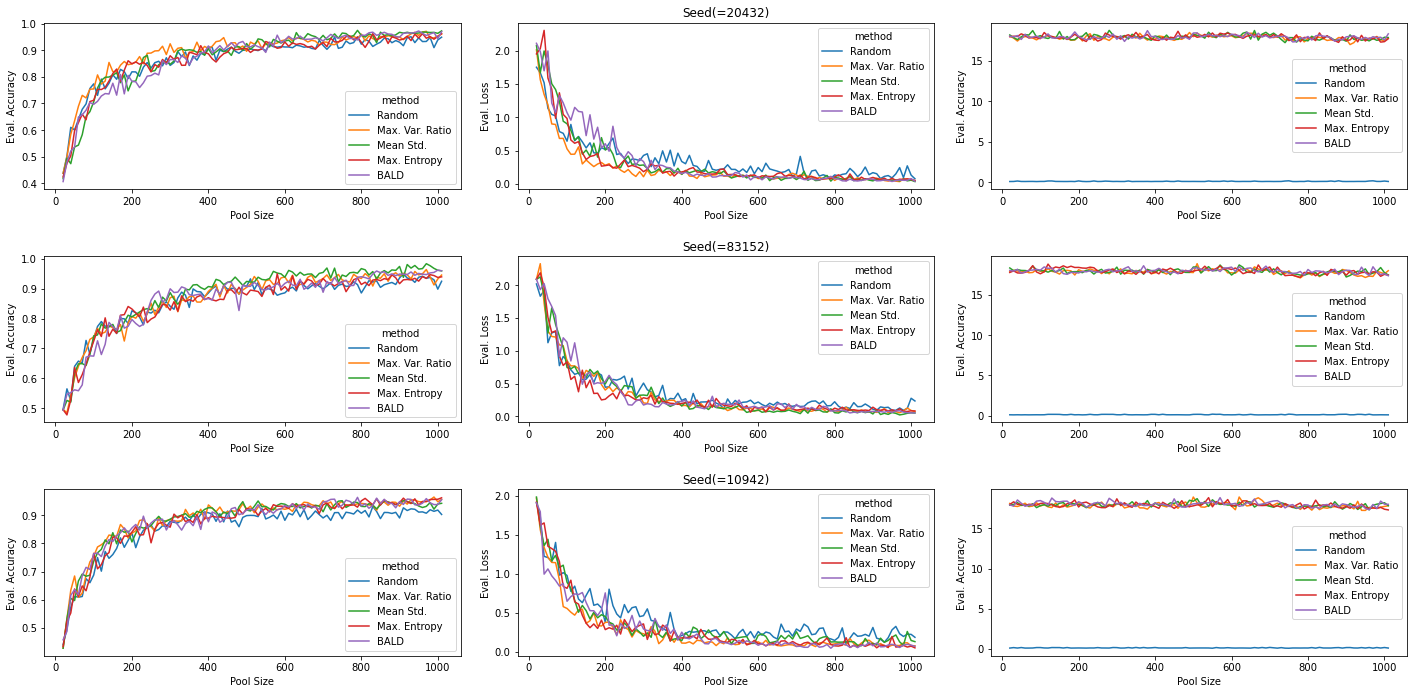

In [32]:
base_experiment_path = os.path.join(METRICS_PATH, "mnist_seed_runs")
experiment_dirs = os.listdir(base_experiment_path)

experiment_frames = load_frames_from_dirs(experiment_dirs)
plot_seed_runs(experiment_frames)

Text(0.5, 1.0, 'Seed(=20432)')

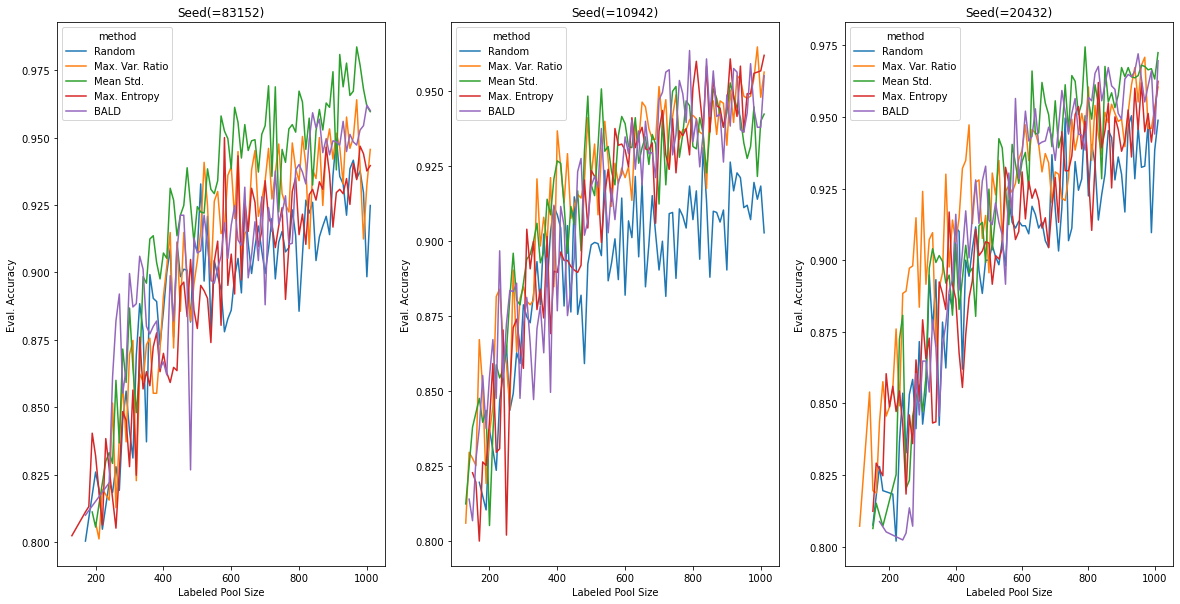

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(20,10))

acc_filter = experiment_frames["83152"]["eval_accuracy"] >= .8
sns.lineplot(ax=ax[0], data = experiment_frames["83152"][acc_filter], x="labeled_pool_size", y="eval_accuracy", hue="method")
ax[0].set_xlabel("Labeled Pool Size")
ax[0].set_ylabel("Eval. Accuracy")
ax[0].set_title("Seed(=83152)")

acc_filter = experiment_frames["10942"]["eval_accuracy"] >= .8
sns.lineplot(ax=ax[1], data = experiment_frames["10942"][acc_filter], x="labeled_pool_size", y="eval_accuracy", hue="method")
ax[1].set_xlabel("Labeled Pool Size")
ax[1].set_ylabel("Eval. Accuracy")
ax[1].set_title("Seed(=10942)")

acc_filter = experiment_frames["20432"]["eval_accuracy"] >= .8
sns.lineplot(ax=ax[2], data = experiment_frames["20432"][acc_filter], x="labeled_pool_size", y="eval_accuracy", hue="method")
ax[2].set_xlabel("Labeled Pool Size")
ax[2].set_ylabel("Eval. Accuracy")
ax[2].set_title("Seed(=20432)")

In [34]:
columns = ["eval_loss", "eval_accuracy", "query_time", "labeled_pool_size"]

def mean_frames(experiment_frames, columns, dtypes):
    """
        
    """
    
    filtered_dtypes = {key: value for key, value in dtypes.items() if key in columns}
    df_mean = {}
    methods = None

    for seed, frame in experiment_frames.items():
        
        # Create separate frame for each method
        methods = np.unique(frame["method"]).tolist()
        for method in methods:

            # No frame for this 
            method_filter = frame["method"] == method
            if method not in df_mean:
                selected = (frame[method_filter])[columns] 
                df_mean[method] = selected
                continue

            selected = (frame[method_filter])[columns]
            df_mean[method] += selected


    # Mean and merge into single frame
    frames = []
    for method, frame in df_mean.items():

        frame /= len(experiment_frames)
        frame.insert(0, "method", method)
        frames.append(frame)
    
    return pd.concat(frames)

In [35]:
merged = mean_frames(experiment_frames, columns, dtypes)

Text(0, 0.5, 'Query Time (in seconds)')

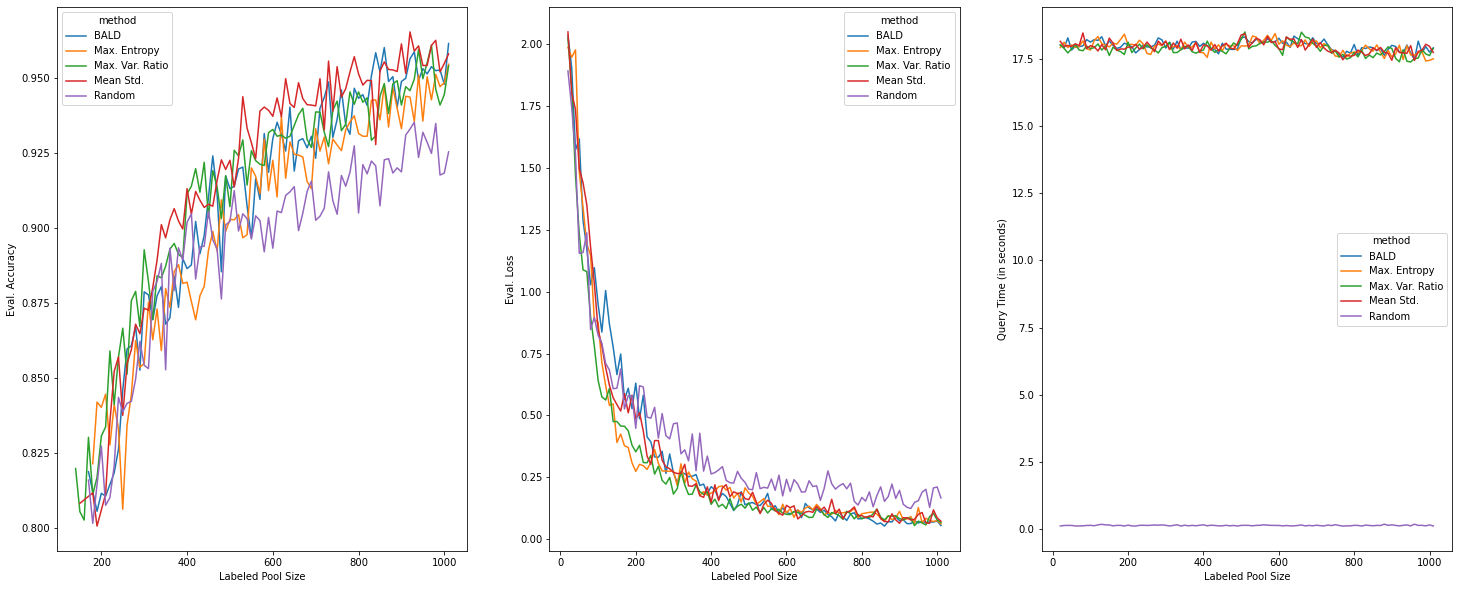

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(25, 10))

acc_filter = merged["eval_accuracy"] >= 0.8
sns.lineplot(ax=ax[0], data=merged[acc_filter], x="labeled_pool_size", y="eval_accuracy", hue="method")
ax[0].set_xlabel("Labeled Pool Size")
ax[0].set_ylabel("Eval. Accuracy")

sns.lineplot(ax=ax[1], data=merged, x="labeled_pool_size", y="eval_loss", hue="method")
ax[1].set_xlabel("Labeled Pool Size")
ax[1].set_ylabel("Eval. Loss")

sns.lineplot(ax=ax[2], data=merged, x="labeled_pool_size", y="query_time", hue="method")
ax[2].set_xlabel("Labeled Pool Size")
ax[2].set_ylabel("Query Time (in seconds)")

# Moment Propagation

['20432', '10942', '83152']


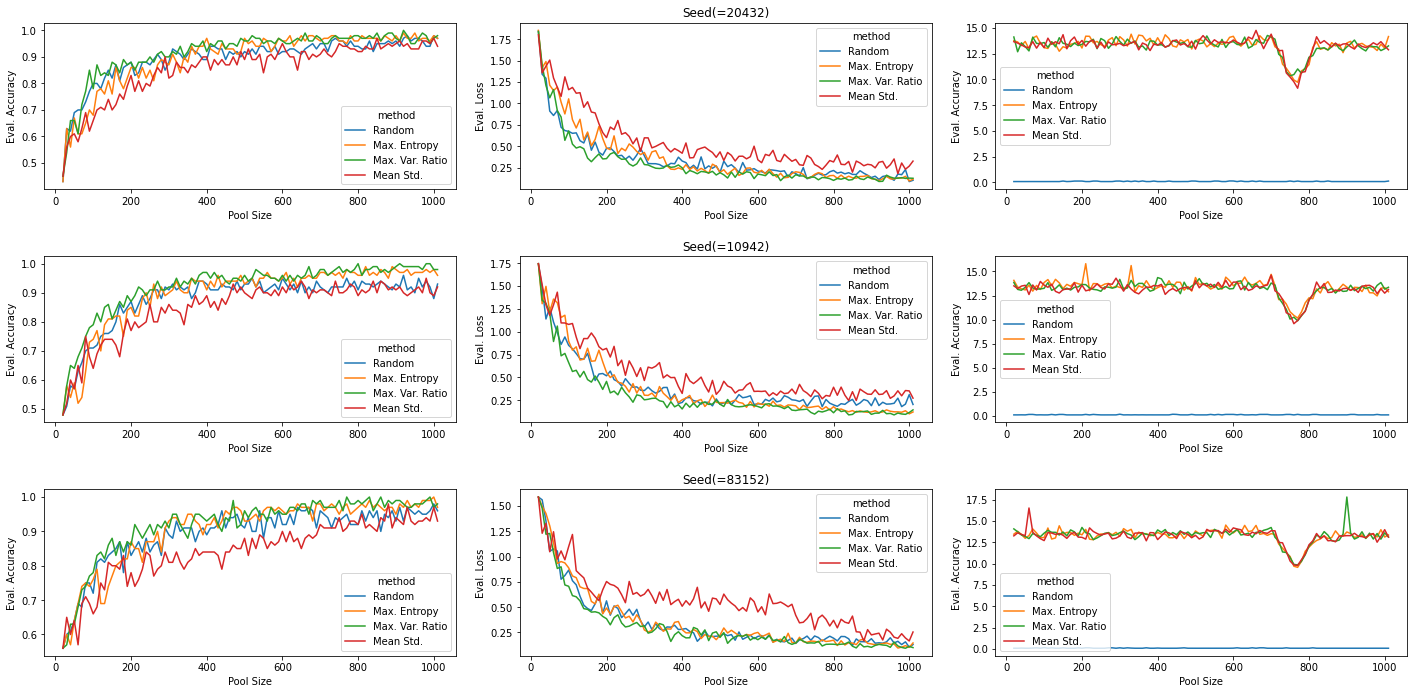

In [37]:
base_experiment_path = os.path.join(METRICS_PATH, "mnist_seed_mp")
experiment_dirs = os.listdir(base_experiment_path)

mp_frames = load_frames_from_dirs(experiment_dirs, "moment_propagation")
mp_frames = {key: value for key, value in mp_frames.items() if key != "41633"}
plot_seed_runs(mp_frames)

Text(0.5, 1.0, 'Seed(=20432)')

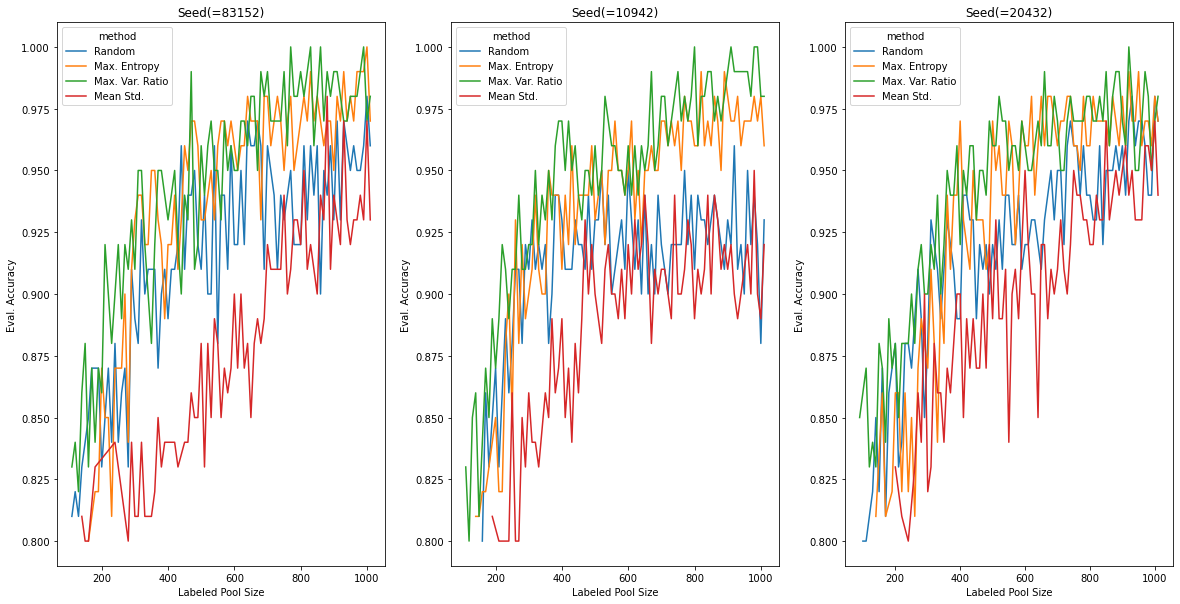

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(20,10))

acc_filter = mp_frames["83152"]["eval_accuracy"] >= .8
sns.lineplot(ax=ax[0], data=mp_frames["83152"][acc_filter], x="labeled_pool_size", y="eval_accuracy", hue="method")
ax[0].set_xlabel("Labeled Pool Size")
ax[0].set_ylabel("Eval. Accuracy")
ax[0].set_title("Seed(=83152)")

acc_filter = mp_frames["10942"]["eval_accuracy"] >= .8
sns.lineplot(ax=ax[1], data=mp_frames["10942"][acc_filter], x="labeled_pool_size", y="eval_accuracy", hue="method")
ax[1].set_xlabel("Labeled Pool Size")
ax[1].set_ylabel("Eval. Accuracy")
ax[1].set_title("Seed(=10942)")

acc_filter = mp_frames["20432"]["eval_accuracy"] >= .8
sns.lineplot(ax=ax[2], data=mp_frames["20432"][acc_filter], x="labeled_pool_size", y="eval_accuracy", hue="method")
ax[2].set_xlabel("Labeled Pool Size")
ax[2].set_ylabel("Eval. Accuracy")
ax[2].set_title("Seed(=20432)")

In [39]:
df_mean = mean_frames(mp_frames, columns, dtypes)

Text(0, 0.5, 'Query Time (in seconds)')

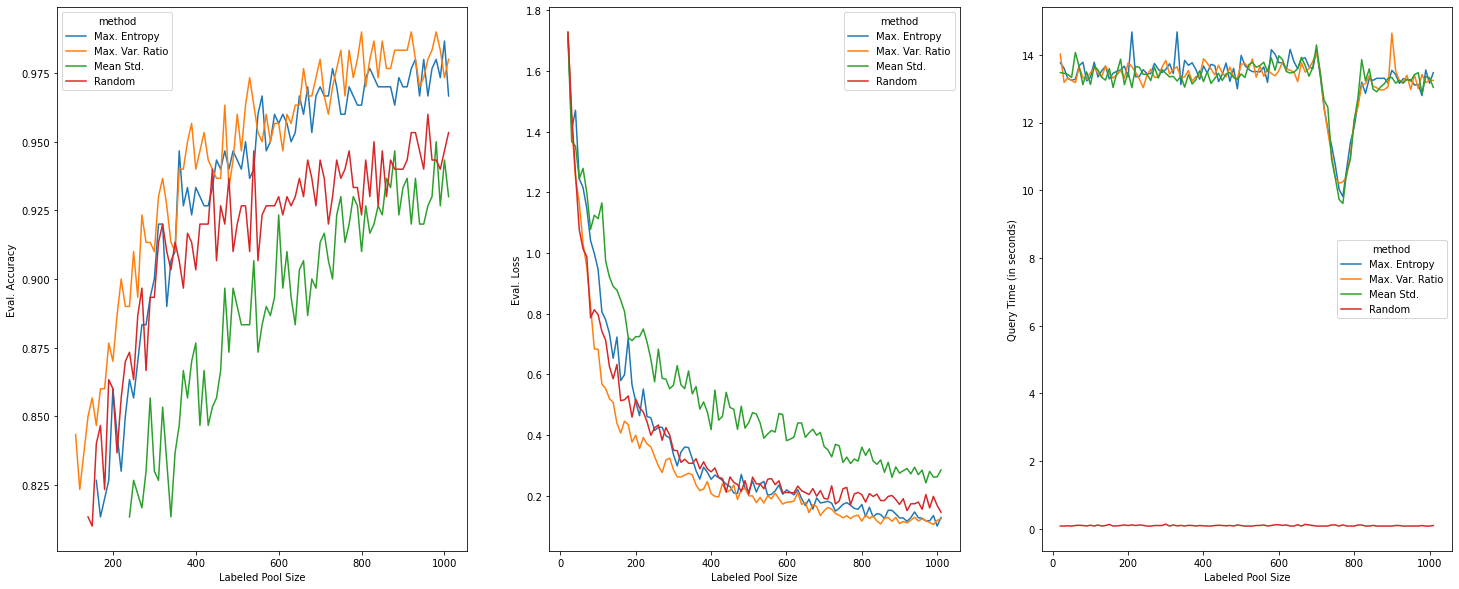

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(25, 10))

acc_filter = df_mean["eval_accuracy"] >= 0.8
sns.lineplot(ax=ax[0], data=df_mean[acc_filter], x="labeled_pool_size", y="eval_accuracy", hue="method")
ax[0].set_xlabel("Labeled Pool Size")
ax[0].set_ylabel("Eval. Accuracy")

sns.lineplot(ax=ax[1], data=df_mean, x="labeled_pool_size", y="eval_loss", hue="method")
ax[1].set_xlabel("Labeled Pool Size")
ax[1].set_ylabel("Eval. Loss")

sns.lineplot(ax=ax[2], data=df_mean, x="labeled_pool_size", y="query_time", hue="method")
ax[2].set_xlabel("Labeled Pool Size")
ax[2].set_ylabel("Query Time (in seconds)")